In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Import mrcnn libraries
sys.path.append("/home/redne/repos/Mask_RCNN/") 
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib

from coco_vis_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
DATASET_ROOT = '/mnt/omreast_users/phhale/csiro_trashnet/datasets/ds0/'
dataset_train = CocoLikeDataset()
#dataset_train.load_data(os.path.join(DATASET_ROOT, 'coco_ds/coco_instances.json'),os.path.join(DATASET_ROOT, 'images'))
dataset_train.load_data(os.path.join(DATASET_ROOT, 'coco_ds/train_coco_instances.json'),
                        os.path.join(DATASET_ROOT, 'images'))
dataset_train.prepare()

dataset_val = CocoLikeDataset()
dataset_val.load_data(os.path.join(DATASET_ROOT, 'coco_ds/test_coco_instances.json'),
                        os.path.join(DATASET_ROOT, 'images'))
dataset_val.prepare()


print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 395
Class Count: 4
  0. BG                                                
  1. H_beveragebottle                                  
  2. D_lid                                             
  3. S_cup                                             


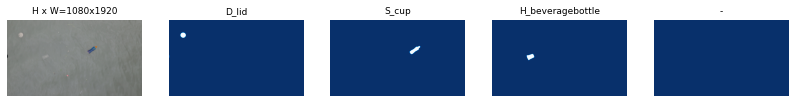

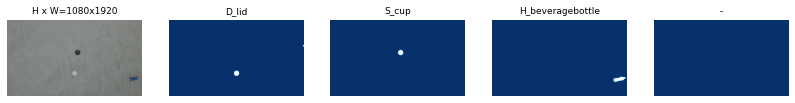

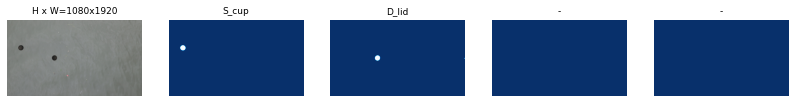

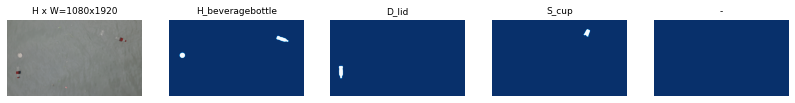

In [6]:
dataset = dataset_train
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)